In [2]:
import matplotlib.pyplot as plt
# 한글처리
import matplotlib as mpl
mpl.rc('font',family='Malgun Gothic')
import seaborn as sns
import pandas as pd

In [3]:
df_ROS = pd.read_csv('../../../datasets/RecurrenceOfSurgery.csv')
df_ROS.head(2)

,Unnamed: 0,환자ID,Large Lymphocyte,Location of herniation,ODI,가족력,간질성폐질환,고혈압여부,과거수술횟수,당뇨여부,...,Modic change,PI,PT,Seg Angle(raw),Vaccum disc,골밀도,디스크단면적,디스크위치,척추이동척도,척추전방위증
0,0,1PT,22.8,3,51.0,0.0,0,0,0,0,...,3,51.6,36.6,14.4,0,-1.01,2048.5,4,Down,0
1,1,2PT,44.9,4,26.0,0.0,0,0,0,0,...,0,40.8,7.2,17.8,0,-1.14,1753.1,4,Up,0


In [4]:
df_ROS_forpatient = df_ROS[['성별', '신장', '심혈관질환', '체중', '흡연여부', '연령', '직업', '혈액형', '재발여부']]

In [5]:
# 1. 목표변수 설정
df_ROS_forpatient.info()  # 목표변수 : 재발여부로 설정

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1894 entries, 0 to 1893
Data columns (total 9 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   성별      1894 non-null   int64  
 1   신장      1894 non-null   int64  
 2   심혈관질환   1894 non-null   int64  
 3   체중      1894 non-null   float64
 4   흡연여부    1894 non-null   int64  
 5   연령      1894 non-null   int64  
 6   직업      1479 non-null   object 
 7   혈액형     1894 non-null   object 
 8   재발여부    1894 non-null   int64  
dtypes: float64(1), int64(6), object(2)
memory usage: 133.3+ KB


In [6]:
# 2. 전처리 : *주의) 대상 컬럼에 의한 레코드 삭제 시 데이터셋 양 고려(레코듣 삭제 시 데이터 양이 너무 적지 않은가 확인해야 함)
# df_ROS_forpatient.isnull().sum() # column별로 개수 확인
df_ROS_forpatient = df_ROS_forpatient.dropna()
df_ROS_forpatient.isnull().sum()

성별       0
신장       0
심혈관질환    0
체중       0
흡연여부     0
연령       0
직업       0
혈액형      0
재발여부     0
dtype: int64

### 상관관계 확인
- 목표변수 : '재발여부'
    (연속형-정규화 확인, 범주형-밸런스 확인)
- 설명변수 :
    - '성별' : 남성의 재발율이 높은 것으로 보임
    - '신장' : 목표변수 대비 분포 변화 적음
    - '심혈관질환' : 질환자는 재발율이 상대적으로 높아 보임
    - '체중' : 몸무게 차이에 따라 분포 변화 있음
    - '흡연여부' : 흡연자는 재발율이 상대적으로 높아 보임
    - '연령': 상대적으로 나이 많으면 재발율이 높은 것으로 보임
    - '직업' : 직업에 따라 재발율의 차이가 있는 것으로 보임->건설업, 운동선수에서 재발율이 상대적으로 높음
    - '혈액형' :  재발율의 차이가 있는 것으로 보임(데이터 양이 1,000개 정도밖에 되지 않아 차이 여부 확인 필요->확증 데이터 분석)
- 분석 스토리 : 

<Axes: xlabel='재발여부', ylabel='count'>

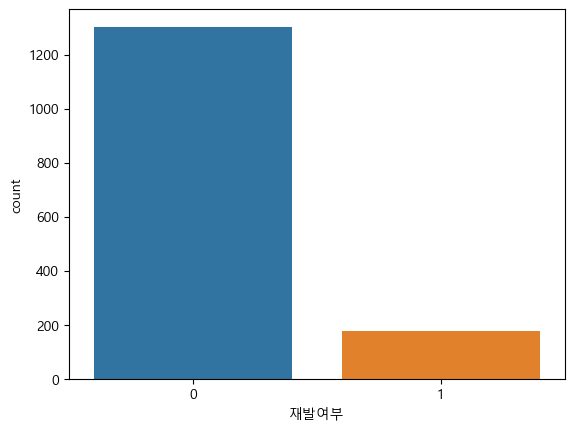

In [7]:
## 데이터 타입과 분포

# 목표변수 : 분포 unbalance
sns.countplot(data=df_ROS_forpatient, x='재발여부')

In [8]:
df_ROS_forpatient.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1479 entries, 0 to 1893
Data columns (total 9 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   성별      1479 non-null   int64  
 1   신장      1479 non-null   int64  
 2   심혈관질환   1479 non-null   int64  
 3   체중      1479 non-null   float64
 4   흡연여부    1479 non-null   int64  
 5   연령      1479 non-null   int64  
 6   직업      1479 non-null   object 
 7   혈액형     1479 non-null   object 
 8   재발여부    1479 non-null   int64  
dtypes: float64(1), int64(6), object(2)
memory usage: 115.5+ KB


In [9]:
# object로 변환할 대상 : '성별', '심혈관질환', '흡연여부', '재발여부'
# df_ROS_forpatient['심혈관질환'].value_counts()
df_ROS_forpatient[['성별', '심혈관질환', '흡연여부', '재발여부']] = df_ROS_forpatient[['성별', '심혈관질환', '흡연여부', '재발여부']].astype(object)
df_ROS_forpatient.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1479 entries, 0 to 1893
Data columns (total 9 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   성별      1479 non-null   object 
 1   신장      1479 non-null   int64  
 2   심혈관질환   1479 non-null   object 
 3   체중      1479 non-null   float64
 4   흡연여부    1479 non-null   object 
 5   연령      1479 non-null   int64  
 6   직업      1479 non-null   object 
 7   혈액형     1479 non-null   object 
 8   재발여부    1479 non-null   object 
dtypes: float64(1), int64(2), object(6)
memory usage: 115.5+ KB


In [10]:
forpatient_list = df_ROS_forpatient.describe().columns.to_list()
forpatient_list

['신장', '체중', '연령']

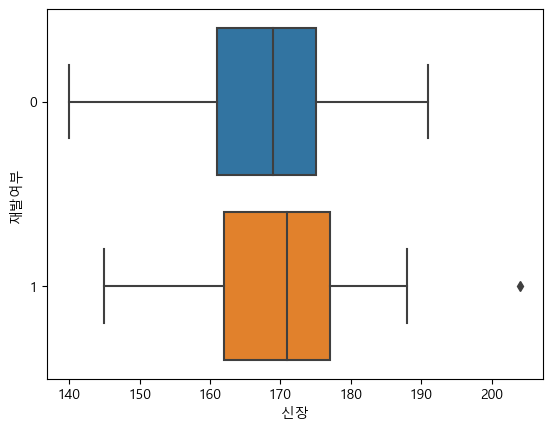

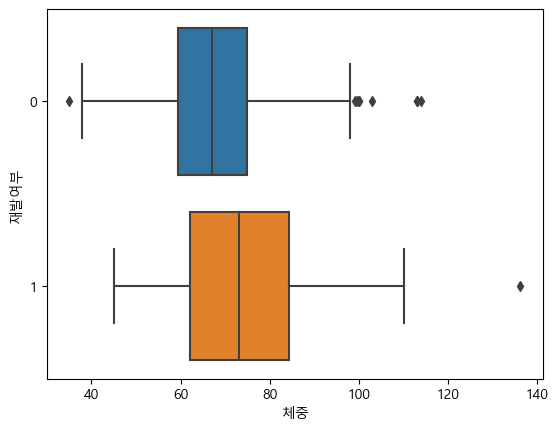

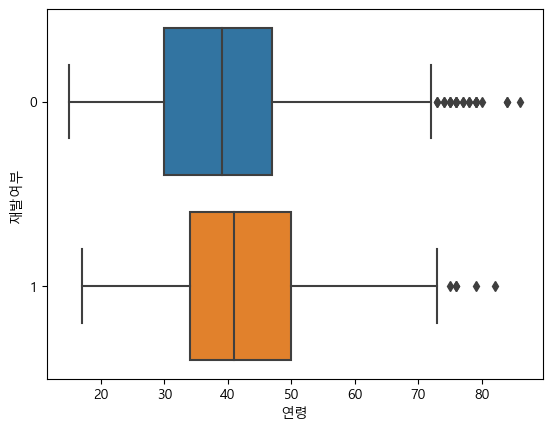

In [11]:
# X:연속형, Y:범주형 -> barplot or boxplot
# 목표변수-y축 / 설명변수-x축
# sns.boxplot(data=df_ROS_forpatient, x='신장', y='재발여부', orient='h')

# item은 내부에서 쓸 변수 이름
for item in forpatient_list :
    sns.boxplot(data=df_ROS_forpatient, x=item, y='재발여부', orient='h') #재발여부에 따른 신장분포
    plt.show()

In [12]:
# X:범주형, Y:범주형 : barplot

# '재발여부'는 drop
# df_ROS_forpatient.drop(columns=['재발여부'])

forpatient_object_list = df_ROS_forpatient.describe(include=object).drop(columns=['재발여부']).columns.to_list()  # for문을 돌리기 위해 columns만 확인
forpatient_object_list

['성별', '심혈관질환', '흡연여부', '직업', '혈액형']

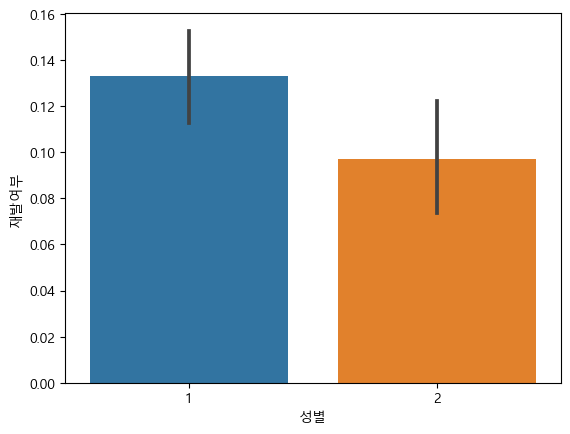

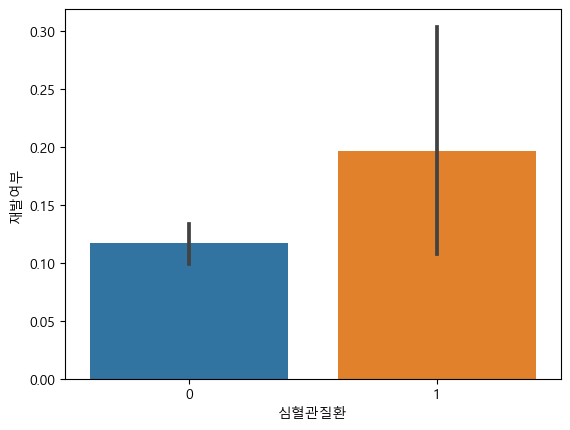

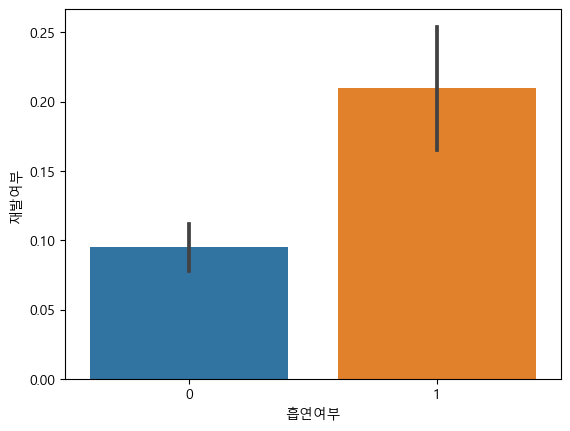

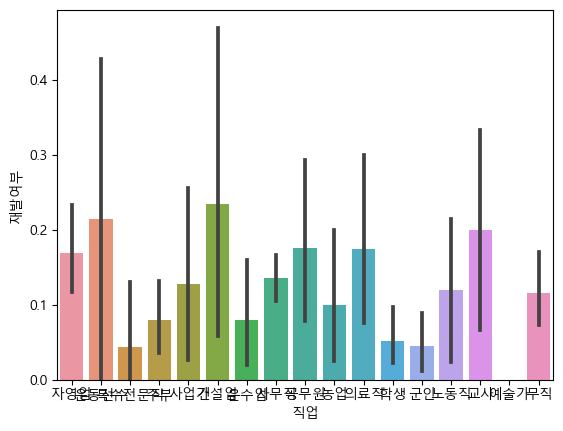

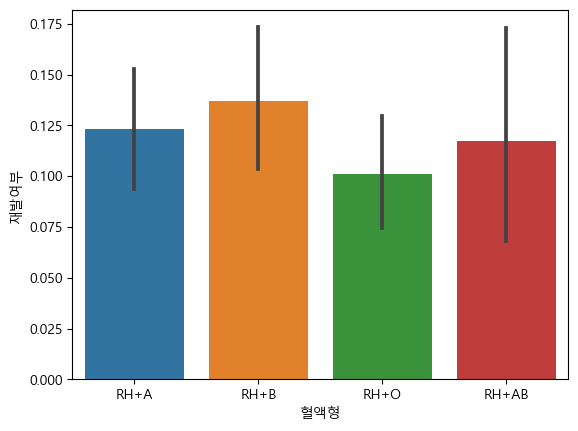

In [13]:
for item in forpatient_object_list :
    sns.barplot(data=df_ROS_forpatient, x=item, y='재발여부')  # 재발여부에 따른 성별의 차이
    plt.show()